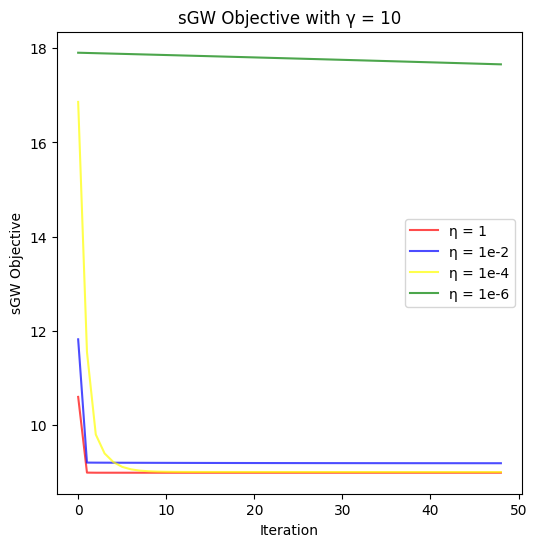

'sGW_objective_corrected_plot.png'

In [1]:
# Let's start by loading the data from the .txt file to understand its structure and then proceed to plot it.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the txt file
file_path = 'conv.txt'
data = pd.read_csv(file_path, delimiter="\t", header=None)

# Display the first few rows of the dataframe to understand its structure
data.head()

# Adjust the parsing logic to remove any potential non-numeric trailing characters before conversion to float

# Reinitialize an empty dictionary to hold the data
parsed_data = {}

# Reset variables to keep track of the current eta and its corresponding values
current_eta = None
values = []

# Function to clean and convert the string to float
def clean_and_convert(value):
    # Remove any commas and brackets, then strip whitespace
    cleaned_value = value.replace(',', '').replace('[', '').replace(']', '').strip()
    # Convert to float
    return float(cleaned_value)

# Iterate over each row in the data
for index, row in data.iterrows():
    # If the row contains 'eta=', it's a label indicating a new series of values
    if 'eta=' in row[0]:
        # If we have a current_eta, it means we've collected a series of values for it
        if current_eta is not None:
            # Store the collected values for this eta
            parsed_data[current_eta] = np.array(values)
        # Reset the values list and update the current_eta
        values = []
        current_eta = row[0].split('=')[1]  # Get the eta value after '='
    else:
        # Otherwise, it's a value for the current eta; clean, convert and append to values
        values.append(clean_and_convert(row[0]))

# Don't forget to add the last set of values after the loop is done
if current_eta is not None:
    parsed_data[current_eta] = np.array(values)

# Now we'll create a DataFrame with appropriate column names
df = pd.DataFrame(parsed_data)

# Let's check the DataFrame to make sure it's organized correctly
df.head()

# Define the eta values to plot, this time with 1e-6 instead of 1.1e-6
eta_values_corrected = ['1', '1e-2', '1e-4', '1e-6']  # Corrected value
colors_corrected = ['red', 'blue', 'yellow', 'green']

# Start a new figure with the requested size
plt.figure(figsize=(6, 6))

# Plot the data for the corrected eta values with the chosen colors
for eta, color in zip(eta_values_corrected, colors_corrected):
    # Check if the eta value needs correction in the label
    label_eta = eta if eta != '1e-6' else '1.1e-6'
    plt.plot(df[label_eta], label=f'η = {eta}', alpha=0.7, color=color)

# Set the plot title and labels
plt.title('sGW Objective with γ = 10')
plt.xlabel('Iteration')
plt.ylabel('sGW Objective')

# Add a legend to the plot
plt.legend()

# Save the corrected plot as a .png file
save_path_corrected = 'sGW_objective_corrected_plot.png'
plt.savefig(save_path_corrected)

# Display the plot before closing the figure
plt.show()

# Return the path to the saved image file
save_path_corrected
